<center><h1 style='color: #36A7A2; font-size: 50px'>Text Mining</h1></center>
<center><h2 style='color: #434e52'>Group Project</h2></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Abdallah Zaher, M20190684</h5></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Cristina Mousinho, M20190303</h5></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Gabriel Ravi, M20190925</h5></center>

<h3 style='color: #434e52'>Initial Preprocessing</h3>



1. Normalization
• Replace links with a special token
• Normalize Dates

2. Lowercasing
 
3. Tokenization:
• Compounds
• Punctuation

4. Remove Stop-Words

5. Stemming and lemmatisation

6. POS filtering

In [1]:
import nltk
import pandas as pd
import os
pd.options.display.max_colwidth = 500

In [121]:
train_df = pd.DataFrame(columns=['Author', 'Text'])
train_df

,Author,Text


In [122]:
author_list = ['AlmadaNegreiros','CamiloCasteloBranco','EcaDeQueiros','JoseRodriguesSantos',
               'JoseSaramago','LuisaMarquesSilva']

for author in author_list:
    go_to = './Train/'+author
    for filename in os.listdir(go_to):
        open_filename = go_to+"/"+filename
        f = open(open_filename, "r", encoding="utf-8")
        train_df = train_df.append({'Author': author, 'Text': f.read()}, ignore_index=True)
        f.close()

In [123]:
train_df.head

<bound method NDFrame.head of                Author  \
0     AlmadaNegreiros   
1     AlmadaNegreiros   
2     AlmadaNegreiros   
3     AlmadaNegreiros   
4     AlmadaNegreiros   
..                ...   
58  LuisaMarquesSilva   
59  LuisaMarquesSilva   
60  LuisaMarquesSilva   
61  LuisaMarquesSilva   
62  LuisaMarquesSilva   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Text  
0   Title: A Scena do Odio\n\nAuthor: José de Almada Negreiros\n\nRelease Date: September 16, 2007 [EBook #22615]\n\nLanguage: Portuguese\n\n\n\n\nA ALVARO DE CAMP

In [124]:
train_df.shape

(63, 2)

In [125]:
# import nltk
# nltk.download()

In [126]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import string
from tqdm import tqdm_notebook as tqdm
import re 

In [127]:
def label_counter(dataframe, field):
    """
    Function that receives a dataframe and the field whose labels you want to count and
    returns the number of positive and negative reviews in the Pandas dataframe.
    """
    return train_df['Author'].value_counts()
# label_counter(train_df, "Author")

In [128]:
def word_counter(text_list):
    """
    Function that receives a list of strings and returns the frequency of each word
    in the set of all strings.
    """
    words_in_df = ' '.join(text_list).split()
    # Count all words 
    freq = pd.Series(words_in_df).value_counts()
    return freq
# word_counter(list(train_df['Text']))[:25]

In [129]:
stop = set(stopwords.words('portuguese'))
# exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('portuguese')

In [154]:
def clean(text_list, lemmatize, stemmer):
    updates = []
    for j in tqdm(range(len(text_list))):
        
        text = text_list[j]
        text = text.lower()
        text = re.sub("[^a-zA-Z0-9µùàçéèçÇ'\u00B5-\u00FF.,]", ' ', text)
        text = BeautifulSoup(text).get_text()
        text = text.split()
        
        if lemmatize:
#             text = " ".join(lemma.lemmatize(word) for word in text.split())
            lem = WordNetLemmatizer()
            text = [lem.lemmatize(word) for word in text if not word in stop] 
            text = " ".join(text)
            updates.append(text)
        
        if stemmer:
            text = " ".join(snowball_stemmer.stem(word) for word in text.split())
        
        updates.append(text)
        
    return updates

def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"Text": list_updated}))

In [155]:
updates = clean(train_df["Text"], lemmatize = True, stemmer = False)

In [156]:
update_df(train_df, updates)
train_df

,Author,Text,Total_words,","
0,AlmadaNegreiros,title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto durante três dia três noites durou revolução 14 maio 1915 satanizo tara vara moysés castigo serpentes riso dentes inferno arder cantar vermelho niagára sexos escancarados chicotes cossacos pan demonio trifauce enfermiço gula genio zarathustra taças maré alta raiva medusa damnação sol ladram vida vivê la deram lat la sina agora quero v...,1173,0
1,AlmadaNegreiros,title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto durante três dia três noites durou revolução 14 maio 1915 satanizo tara vara moysés castigo serpentes riso dentes inferno arder cantar vermelho niagára sexos escancarados chicotes cossacos pan demonio trifauce enfermiço gula genio zarathustra taças maré alta raiva medusa damnação sol ladram vida vivê la deram lat la sina agora quero v...,1173,0
2,AlmadaNegreiros,title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto durante três dia três noites durou revolução 14 maio 1915 satanizo tara vara moysés castigo serpentes riso dentes inferno arder cantar vermelho niagára sexos escancarados chicotes cossacos pan demonio trifauce enfermiço gula genio zarathustra taças maré alta raiva medusa damnação sol ladram vida vivê la deram lat la sina agora quero v...,193,0
3,AlmadaNegreiros,title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto durante três dia três noites durou revolução 14 maio 1915 satanizo tara vara moysés castigo serpentes riso dentes inferno arder cantar vermelho niagára sexos escancarados chicotes cossacos pan demonio trifauce enfermiço gula genio zarathustra taças maré alta raiva medusa damnação sol ladram vida vivê la deram lat la sina agora quero v...,193,0
4,AlmadaNegreiros,title jardim pierrette author josé almada negreiros release date september 23 2007 ebook 22730 language portuguese argumento bailado pierrot n'aquella noite pensar disse queria morrer pierrot coitado razão dia inteiro ver pierrette viver deitou cançado n'um jardim qualquer havia luz palacio linda menina fazer poi logo quiz deus senhor fôsse jardim pierrette pierrot quiz acreditar ficou contente procurou pedrinha atirou pierrette ouviu espreitou viu ninguem porque pierrot escondido canteiros ...,3276,0
...,...,...,...,...
58,LuisaMarquesSilva,obras camillo castello branco novella minho volume i segunda edição lisboa parceria antonio maria pereira livraria editora rua augusta 50 52 54 1903 obras camillo castello branco edição popular xvii novella minho volume publicados i coisas espantosas ii tres irmans iii engeitada iv doze casamentos felizes v esqueleto vi bem mal vii senhor paço ninães viii anathema ix mulher fatal x cavar ruinas xi correspondencia epistolar xii xiii divindade jesus xiv doida candal xv duas horas leitura xvi f...,39775,0
59,LuisaMarquesSilva,obras camillo castello branco novella minho volume i segunda edição lisboa parceria antonio maria pereira livraria editora rua augusta 50 52 54 1903 obras camillo castello branco edição popular xvii novella minho volume publicados i coisas espantosas ii tres irmans iii engeitada iv doze casamentos felizes v esqueleto vi bem mal vii senhor paço ninães viii anathema ix mulher fatal x cavar ruinas xi correspondencia epistolar xii xiii divindade jesus xiv doida candal xv duas horas leitura xvi f...,39775,0
60,LuisaMarquesSilva,scenas contemporaneas camillo castello branco 2 edição porto casa cruz coutinho editor rua caldeireiros n 18 20 1862 porto typographia antonio josé silva teixeira rua cancella velha n 62 morrer capricho i amigo certo sabem caçar coelhos neve admira 

##


## Create Bag-of-Words

Each word is a feature. Our feature space is defined by our vocabulary. Documents/pieces of text will be represented as sparse vectors.

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
stop = set(stopwords.words('portuguese'))
# cv = CountVectorizer(max_df=0.9, binary=True)
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop,
    max_features=10000, 
    ngram_range=(1,3)
)

In [134]:
X = cv.fit_transform(train_df["Text"])
y = np.array(train_df["Author"])

In [135]:
X.shape

(63, 10000)

In [136]:
#list(cv.vocabulary_)[:10]

In [137]:
list(cv.vocabulary_.keys())[:10]

['scena',
 'odio',
 'author',
 'almada',
 'negreiros',
 '16',
 'alvaro',
 'campos',
 'poema',
 'escripto']

In [138]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [139]:
#train_df

In [140]:
# train_df['Text']

In [141]:
top_df = get_top_n_grams(train_df['Text'], top_k=20, n=1)
top_df

,Ngram,Freq
0,elle,6288
1,ella,5579
2,disse,4654
3,ha,3985
4,ser,3672
5,dia,3383
6,casa,3376
7,onde,3242
8,homem,3149
9,ainda,3148


In [142]:
import numpy as np
import matplotlib.pyplot as plt
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

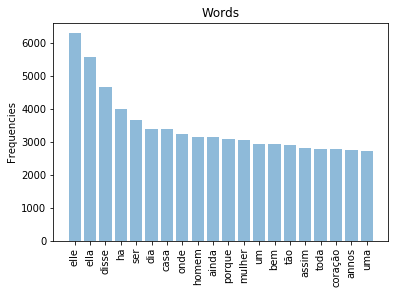

In [143]:
plot_frequencies(top_df)

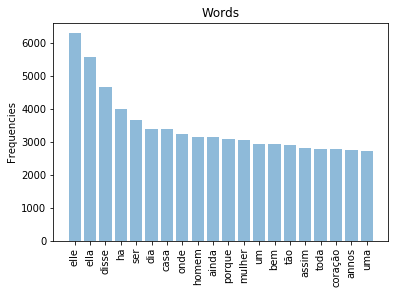

In [144]:
top_df2 = get_top_n_grams(train_df["Text"], top_k=20, n=2)
plot_frequencies(top_df)

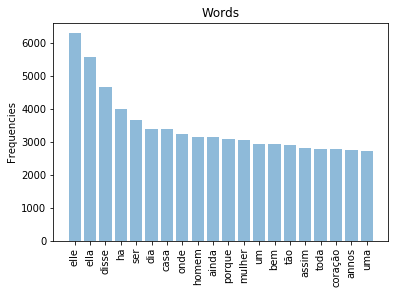

In [26]:



top_df3 = get_top_n_grams(train_df["Text"], top_k=20, n=3)
plot_frequencies(top_df)

In [27]:
#top_df

Now that we have all the words, we will try to get the number of words per paragraph

In [92]:
train_df.tail

<bound method NDFrame.tail of                Author  \
0     AlmadaNegreiros   
1     AlmadaNegreiros   
2     AlmadaNegreiros   
3     AlmadaNegreiros   
4     AlmadaNegreiros   
..                ...   
58  LuisaMarquesSilva   
59  LuisaMarquesSilva   
60  LuisaMarquesSilva   
61  LuisaMarquesSilva   
62  LuisaMarquesSilva   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Text  
0   title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto

### Number of words per paragraph and text

In [148]:
train_df1 = train_df

In [149]:
train_df1['Total_words'] = [len(x.split()) for x in train_df1['Text'].tolist()]
train_df1

,Author,Text,Total_words
0,AlmadaNegreiros,title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto durante três dia três noites durou revolução 14 maio 1915 satanizo tara vara moysés castigo serpentes riso dentes inferno arder cantar vermelho niagára sexos escancarados chicotes cossacos pan demonio trifauce enfermiço gula genio zarathustra taças maré alta raiva medusa damnação sol ladram vida vivê la deram lat la sina agora quero v...,1173
1,AlmadaNegreiros,title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto durante três dia três noites durou revolução 14 maio 1915 satanizo tara vara moysés castigo serpentes riso dentes inferno arder cantar vermelho niagára sexos escancarados chicotes cossacos pan demonio trifauce enfermiço gula genio zarathustra taças maré alta raiva medusa damnação sol ladram vida vivê la deram lat la sina agora quero v...,1173
2,AlmadaNegreiros,title jardim pierrette author josé almada negreiros release date september 23 2007 ebook 22730 language portuguese argumento bailado pierrot n'aquella noite pensar disse queria morrer pierrot coitado razão dia inteiro ver pierrette viver deitou cançado n'um jardim qualquer havia luz palacio linda menina fazer poi logo quiz deus senhor fôsse jardim pierrette pierrot quiz acreditar ficou contente procurou pedrinha atirou pierrette ouviu espreitou viu ninguem porque pierrot escondido canteiros ...,193
3,AlmadaNegreiros,title jardim pierrette author josé almada negreiros release date september 23 2007 ebook 22730 language portuguese argumento bailado pierrot n'aquella noite pensar disse queria morrer pierrot coitado razão dia inteiro ver pierrette viver deitou cançado n'um jardim qualquer havia luz palacio linda menina fazer poi logo quiz deus senhor fôsse jardim pierrette pierrot quiz acreditar ficou contente procurou pedrinha atirou pierrette ouviu espreitou viu ninguem porque pierrot escondido canteiros ...,193
4,AlmadaNegreiros,title invenção dia claro author josé almada negreiros release date september 29 2007 ebook 22801 language portuguese escripta maneira toda espécies orgulho seguida démarches invenção acompanhada confidencias intima geraes ensaios iniciação portuguezes revelação pintura retrato autor elle proprio primeiro milhar lisbôa olisipo apartado 145 1921 nous savons donner notre vie toute entiére tous le jours bénnissons la vie saluons la naissance du travail nouveau le monde n'a pa d'âges l'humanité d...,3276
...,...,...,...
58,LuisaMarquesSilva,cidade serra cidade serra i amigo jacintho nasceu n'um palacio cento nove conto renda terras semeadura vinhedo cortiça d'olival alemtejo extremadura atravez duas beira densas sebe ondulando collina valle muros alto boa pedra ribeiras estradas delimitavam campos d'esta velha familia agricola entulhava grão plantava cepa tempo d'el rei d diniz quinta casa senhorial tormes baixo douro cobriam serra tinhela cinco fartas legoas todo torrão pagava fôro cerrados pinheiraes negrejavam desde arga mar...,39775
59,LuisaMarquesSilva,cidade serra cidade serra i amigo jacintho nasceu n'um palacio cento nove conto renda terras semeadura vinhedo cortiça d'olival alemtejo extremadura atravez duas beira densas sebe ondulando collina valle muros alto boa pedra ribeiras estradas delimitavam campos d'esta velha familia agricola entulhava grão plantava cepa tempo d'el rei d diniz quinta casa senhorial tormes baixo douro cobriam serra tinhela cinco fartas legoas todo torrão pagava fôro cerrados pinheiraes negrejavam desde arga mar...,39775
60,LuisaMarquesSilva,cartas inglaterra porto livraria chardron lello irmão editores 1905 obras eça queiroz i afghanistan irlanda inglezes experimentando atribulado imperio india verdade d'esse humoristico logar commum seculo xviii historia velhota repete cessar » fado providencia entidade qu

In [150]:
train_df1['Author'].value_counts()

CamiloCasteloBranco    20
JoseSaramago           12
LuisaMarquesSilva       9
AlmadaNegreiros         9
JoseRodriguesSantos     8
EcaDeQueiros            5
Name: Author, dtype: int64

In [151]:
train_df1.groupby(["Author", "Total_words"]).size()

Author               Total_words
AlmadaNegreiros      193            2
                     345            1
                     478            2
                     1173           2
                     3276           2
CamiloCasteloBranco  345            1
                     1550           2
                     3794           2
                     3845           2
                     5877           2
                     6958           2
                     9277           2
                     26876          1
                     27526          2
                     29321          2
                     32504          2
EcaDeQueiros         7988           2
                     26876          1
                     29410          2
JoseRodriguesSantos  2179           2
                     2903           2
                     3142           2
                     30926          2
JoseSaramago         25318          2
                     26603          2
                 

### Here we can find de freq of anything (just need to automatise)
Let's count each main character that can be important

In [162]:
import re
train_df1[','] = train_df1.apply(lambda x: len(re.findall(",", x.Text)), axis = 1) 
train_df1['Deus'] = train_df1.apply(lambda x: len(re.findall("a", x.Text)), axis = 1) 

In [165]:
train_df1

,Author,Text,Total_words,",",Deus
0,AlmadaNegreiros,title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto durante três dia três noites durou revolução 14 maio 1915 satanizo tara vara moysés castigo serpentes riso dentes inferno arder cantar vermelho niagára sexos escancarados chicotes cossacos pan demonio trifauce enfermiço gula genio zarathustra taças maré alta raiva medusa damnação sol ladram vida vivê la deram lat la sina agora quero v...,1173,0,968
1,AlmadaNegreiros,title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto durante três dia três noites durou revolução 14 maio 1915 satanizo tara vara moysés castigo serpentes riso dentes inferno arder cantar vermelho niagára sexos escancarados chicotes cossacos pan demonio trifauce enfermiço gula genio zarathustra taças maré alta raiva medusa damnação sol ladram vida vivê la deram lat la sina agora quero v...,1173,0,968
2,AlmadaNegreiros,title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto durante três dia três noites durou revolução 14 maio 1915 satanizo tara vara moysés castigo serpentes riso dentes inferno arder cantar vermelho niagára sexos escancarados chicotes cossacos pan demonio trifauce enfermiço gula genio zarathustra taças maré alta raiva medusa damnação sol ladram vida vivê la deram lat la sina agora quero v...,193,0,968
3,AlmadaNegreiros,title scena odio author josé almada negreiros release date september 16 2007 ebook 22615 language portuguese alvaro campos excerptos poema desbaratado escripto durante três dia três noites durou revolução 14 maio 1915 satanizo tara vara moysés castigo serpentes riso dentes inferno arder cantar vermelho niagára sexos escancarados chicotes cossacos pan demonio trifauce enfermiço gula genio zarathustra taças maré alta raiva medusa damnação sol ladram vida vivê la deram lat la sina agora quero v...,193,0,968
4,AlmadaNegreiros,title jardim pierrette author josé almada negreiros release date september 23 2007 ebook 22730 language portuguese argumento bailado pierrot n'aquella noite pensar disse queria morrer pierrot coitado razão dia inteiro ver pierrette viver deitou cançado n'um jardim qualquer havia luz palacio linda menina fazer poi logo quiz deus senhor fôsse jardim pierrette pierrot quiz acreditar ficou contente procurou pedrinha atirou pierrette ouviu espreitou viu ninguem porque pierrot escondido canteiros ...,3276,0,136
...,...,...,...,...,...
58,LuisaMarquesSilva,obras camillo castello branco novella minho volume i segunda edição lisboa parceria antonio maria pereira livraria editora rua augusta 50 52 54 1903 obras camillo castello branco edição popular xvii novella minho volume publicados i coisas espantosas ii tres irmans iii engeitada iv doze casamentos felizes v esqueleto vi bem mal vii senhor paço ninães viii anathema ix mulher fatal x cavar ruinas xi correspondencia epistolar xii xiii divindade jesus xiv doida candal xv duas horas leitura xvi f...,39775,0,23421
59,LuisaMarquesSilva,obras camillo castello branco novella minho volume i segunda edição lisboa parceria antonio maria pereira livraria editora rua augusta 50 52 54 1903 obras camillo castello branco edição popular xvii novella minho volume publicados i coisas espantosas ii tres irmans iii engeitada iv doze casamentos felizes v esqueleto vi bem mal vii senhor paço ninães viii anathema ix mulher fatal x cavar ruinas xi correspondencia epistolar xii xiii divindade jesus xiv doida candal xv duas horas leitura xvi f...,39775,0,23421
60,LuisaMarquesSilva,scenas contemporaneas camillo castello branco 2 edição porto casa cruz coutinho editor rua caldeireiros n 18 20 1862 porto typographia antonio josé silva teixeira rua cancella velha n 62 morrer capricho i ami

### TF AND ITF

Understand the "weight" of each word per text

In [166]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [183]:
# get feature names
feature_names = cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc = train_df1['Text'][2]
 
#generate tf-idf for the given document
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

In [184]:
tf_idf_vector.toarray()

array([[0.        , 0.        , 0.        , ..., 0.02276403, 0.        ,
        0.        ]])

In [185]:
def extract_feature_scores(feature_names, document_vector):
    """
    Function that creates a dictionary with the TF-IDF score for each feature.
    :param feature_names: list with all the feature words.
    :param document_vector: vector containing the extracted features for a specific document
    
    :return: returns a sorted dictionary "feature":"score".
    """
    feature2score = {}
    for i in range(len(feature_names)):
        feature2score[feature_names[i]] = document_vector[0][i]    
    return sorted(feature2score.items(), key=lambda kv: kv[1], reverse=True)

In [186]:
extract_feature_scores(feature_names, tf_idf_vector.toarray())[:10]

[('larga', 0.32016741308033514),
 ('cantar', 0.22033049548969613),
 ('vós', 0.20869601945999927),
 ('nero', 0.18288062722063395),
 ('la', 0.17622347561213464),
 ('co', 0.14667899842613283),
 ('sina', 0.14667899842613283),
 ('borgia', 0.1418952935998948),
 ('rabo', 0.13283791551184856),
 ('genios', 0.12886155046024092)]

In [187]:
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

In [181]:
tf_idf_vector 

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 409 stored elements in Compressed Sparse Row format>

### Linear Classifiers

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [188]:
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import numpy as np

class Classifier(object):
    """ Multi Class Classifier base class """

    def __init__(self, input_size, n_classes):
        """
        Initializes a matrix in which each column will be the Weights for a specific class.
        :param input_size: Number of features
        :param n_classes: Number of classes to classify the inputs
        """
        self.parameters = np.zeros((input_size+1, n_classes)) # input_size +1 to include the Bias term

    def train(self, X, Y, devX, devY, epochs=20):
        """
        This trains the perceptron over a certain number of epoch and records the
            accuracy in Train and Dev sets along each epoch.
        :param X: numpy array with size DxN where D is the number of training examples
                 and N is the number of features.
        :param Y: numpy array with size D containing the correct labels for the training set
        :param devX (optional): same as X but for the dev set.
        :param devY (optional): same as Y but for the dev set.
        :param epochs (optional): number of epochs to run.
        """
        train_accuracy = [self.evaluate(X, Y)]
        dev_accuracy = [self.evaluate(devX, devY)]
        for epoch in range(epochs):
            for i in tqdm(range(X.shape[0])):
                self.update_weights(X[i, :], Y[i])
            train_accuracy.append(self.evaluate(X, Y))
            dev_accuracy.append(self.evaluate(devX, devY))
        return train_accuracy, dev_accuracy
        

    def evaluate(self, X, Y):
        """
        Evaluates the error in a given set of examples.
        :param X: numpy array with size DxN where D is the number of examples to 
                    evaluate and N is the number of features.
        :param Y: numpy array with size D containing the correct labels for the training set
        """
        correct_predictions = 0
        for i in range(X.shape[0]):
            y_pred = self.predict(X[i, :])
            if Y[i] == y_pred:
                correct_predictions += 1
        return correct_predictions/X.shape[0]


    def plot_train(self, train_accuracy, dev_accuracy):
        """
        Function to Plot the accuracy of the Training set and Dev set per epoch.
        :param train_accuracy: list containing the accuracies of the train set.
        :param dev_accuracy: list containing the accuracies of the dev set.
        """
        x_axis = [epoch+1 for epoch in range(len(train_accuracy))]
        plt.plot(x_axis, train_accuracy, '-g', linewidth=1, label='Train')
        plt.xlabel("epochs")
        plt.ylabel("Accuracy")
        plt.plot(x_axis, dev_accuracy, 'b-', linewidth=1, label='Dev')
        plt.legend()
        plt.show()


    def update_weights(self, x, y):
        """
        Function that will take an input example and the true prediction and will 
            update the model parameters.
        
        :param x: Array of size N where N its the number of features that the model 
                  takes as input.
        :param y: The int corresponding to the correct label.
        
        child classes must implement this function
        """
        pass

    def predict(self, x):
        """
        This function will add a Bias value to the received input, multiply the Weights 
            corresponding to the different classeswith the input vector and choose the 
            class that maximizes that multiplication.
        
        :param x: numpy array with size 1xN where N = number of features.
        
        child classes must implement this function
        """
        pass